<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_covid19_analyst_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python COVID19 



## COVID19 fertőzések magyarországi adatainak elemzése



<https://klajosw.blogspot.com/>

source: 
<https://github.com/CSSEGISandData/COVID-19>,
<https://github.com/datasets/covid-19>,
<https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv>,
<https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv>



---


---

# A COVID-19 virus által megerősített esetek elemzése


---

             Date  Country  Confirmed  Recovered  Deaths  days_delta
18310  2020-08-24  Hungary       5191       3695     613        36.0
18311  2020-08-25  Hungary       5215       3716     614        24.0
18312  2020-08-26  Hungary       5288       3734     614        73.0
18313  2020-08-27  Hungary       5379       3757     614        91.0
18314  2020-08-28  Hungary       5511       3759     614       132.0
18315  2020-08-29  Hungary       5669       3759     614       158.0
18316  2020-08-30  Hungary       5961       3759     614       292.0
18317  2020-08-31  Hungary       6139       3761     615       178.0
18318  2020-09-01  Hungary       6257       3821     616       118.0
18319  2020-09-02  Hungary       6622       3903     619       365.0
18320  2020-09-03  Hungary       6923       3930     620       301.0
18321  2020-09-04  Hungary       7382       3944     621       459.0
18322  2020-09-05  Hungary       7892       3952     624       510.0
18323  2020-09-06  Hungary       8

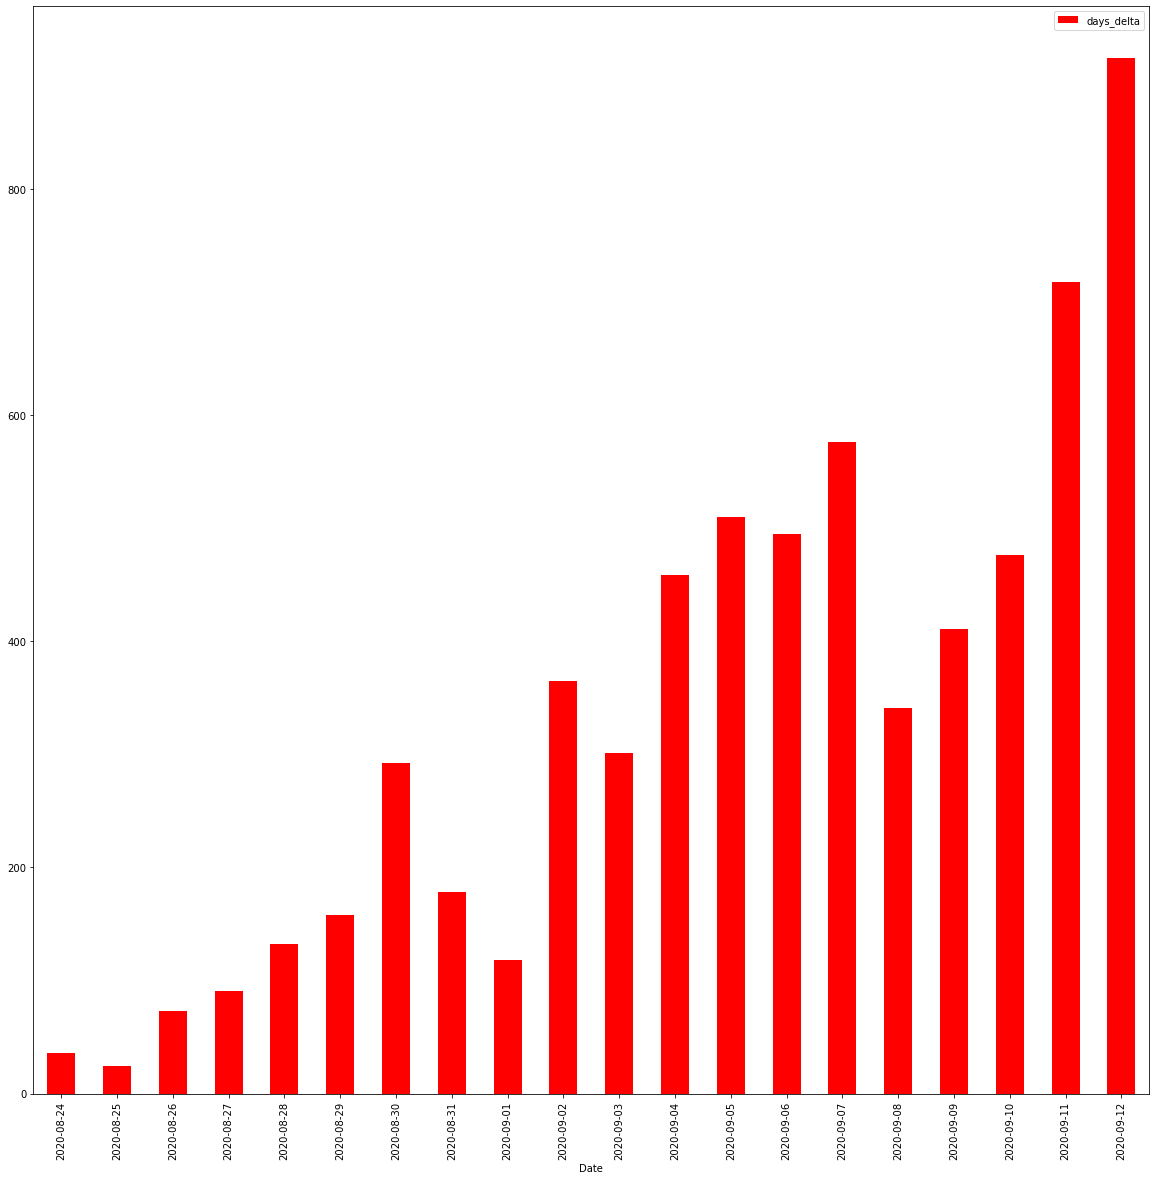

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

## ----- step 1 : Download data)----
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)

## ----- step 2 : Select country : Hungary 
#df_hungary = df1[df1['Country'] == 'Hungary']
df_hungary = df1.loc[(df1['Country'] == 'Hungary') &  (df1['Date'] > '2020-08-01')]            ## Szűrés dátumra is

df_hungary['days_delta'] = df_hungary['Confirmed'].shift(0) - df_hungary['Confirmed'].shift(1)  ## előző kivonása és napi változás képzése

## --idő tartomány kiválasztása
df_hungary = df_hungary[-20:]  ## utolsó 30 nap
print(df_hungary.head(20))  ## listázás

#### ----- Step 3 (Plot data)----
plt.rcParams["figure.figsize"] = 20,20                                                         ## Remove if not on Jupyter
df_hungary.plot(kind = 'bar', x = 'Date', y = 'days_delta', color = 'red')                   ## piros szin
plt.show()

      location        date  total_cases  new_cases  total_deaths  new_deaths
17884  Hungary  2020-08-25       5191.0       36.0         613.0         0.0
17885  Hungary  2020-08-26       5215.0       24.0         614.0         1.0
17886  Hungary  2020-08-27       5288.0       73.0         614.0         0.0
17887  Hungary  2020-08-28       5379.0       91.0         614.0         0.0
17888  Hungary  2020-08-29       5511.0      132.0         614.0         0.0
17889  Hungary  2020-08-30       5669.0      158.0         614.0         0.0
17890  Hungary  2020-08-31       5961.0      292.0         614.0         0.0
17891  Hungary  2020-09-01       6139.0      178.0         615.0         1.0
17892  Hungary  2020-09-02       6257.0      118.0         616.0         1.0
17893  Hungary  2020-09-03       6622.0      365.0         619.0         3.0
17894  Hungary  2020-09-04       6923.0      301.0         620.0         1.0
17895  Hungary  2020-09-05       7382.0      459.0         621.0         1.0

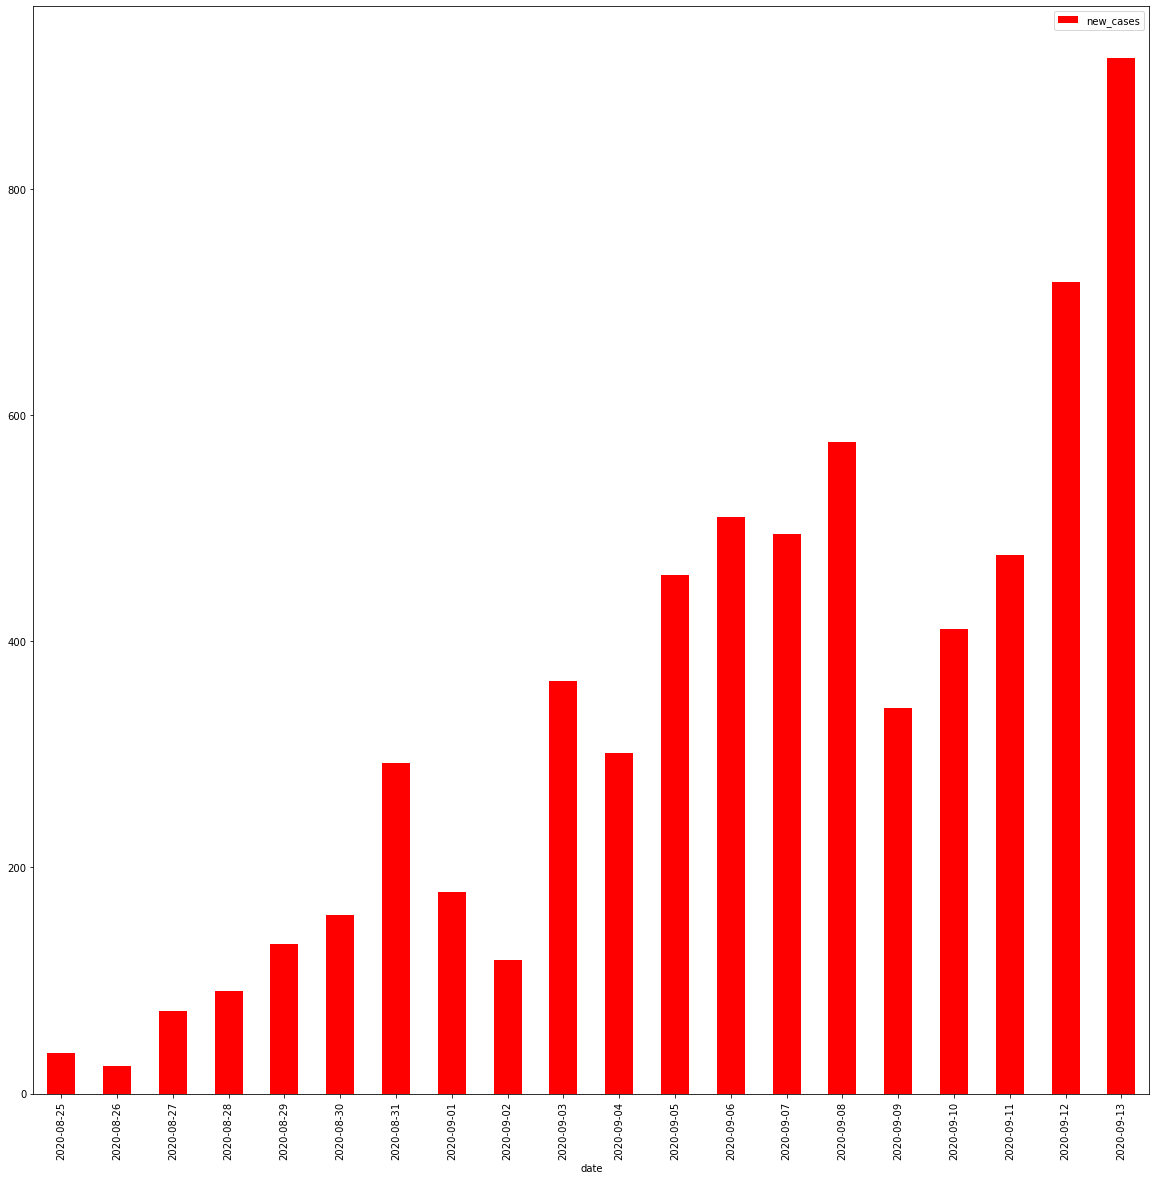

In [ ]:
## modulok betöltése
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

#### ---- Step 1:- Download data
URL_DATASET = r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(URL_DATASET, usecols = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths',  'new_deaths'])
#df = pd.read_csv(URL_DATASET)

df_hungary = df.loc[(df['location'] == 'Hungary') &  (df['date'] > '2020-08-01')]  

## --idő tartomány kiválasztása
df_hungary = df_hungary[-20:]  ## utolsó 30 nap
print(df_hungary.head(20))  ## listázás

#### ----- Step 3 (Plot data)----

plt.rcParams["figure.figsize"]=20,20                                                       ## Remove if not on Jupyter
df_hungary.plot(kind = 'bar', x = 'date', y = 'new_cases', color = 'red')                   ## piros szin

plt.show()


In [ ]:
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/09-12-2020.csv
# FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
## modulok betöltése
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import pandas as pd
pd.options.mode.chained_assignment = None

#datum = '09-12-2020'
#x = datetime.datetime(2020, 5, 17)
x = datetime.datetime.now()

datum2 = '' + str(x.month) + '-' + str(x.day - 1)  + '-' + str(x.year)
datum = '' + x.strftime("%m") + '-' + str(int(x.strftime("%d")) - 1)  + '-' + x.strftime("%Y")

#### ---- Step 1:- Download data
URL_DATASET = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+datum +'.csv'
df = pd.read_csv(URL_DATASET, usecols = ['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active'])
#df = pd.read_csv(URL_DATASET)

df_hungary = df.loc[(df['Country_Region'] == 'Hungary') &  (df['Last_Update'] > '2020-08-01')]  

## --idő tartomány kiválasztása
df_hungary = df_hungary[-20:]  ## utolsó 30 nap
print(df_hungary.head(20))  ## listázás




    Country_Region          Last_Update  Confirmed  Deaths  Recovered  Active
231        Hungary  2020-09-13 04:30:52      11825     633       4058  7134.0
